In [702]:
# Initialize Otter
import otter
grader = otter.Notebook("hwk3-task1-spills.ipynb")

# Task 1: Visualizing oil spills in NY State

## Instructions

- First, update the following cell to have a link to *your* Homework 2 GitHub repository:

**UPDATE THIS LINK**
https://github.com/vedikaS-byte/eds220-hwk3

- Review the [complete rubric for this task](https://docs.google.com/document/d/1Ce4EO3MEHW5uLks4x8BECWlkim2bcmxB4f8Qo4z26z8/edit?tab=t.0) before starting.

- **Meaningful commits should be made every time you finish a major step.** We'll check your repository and view the commit history.

- Comment mindfully in a way that enriches your code. Comments should follow best practices.

- **Do not update the top cell with the `otter` import**, this is used internally for grading.


## About the data
In this task you will use two datsets:

### First dataset: oil spills data

The first dataset contains information about [spilling incidents in the state of New York](https://data.ny.gov/Energy-Environment/Spill-Incidents/u44d-k5fk). 
The data portal has plenty of information. 
You will find extra information and metadata for this datset in the `NYSDEC_SpillIncidents_Overview.pdf` and `NYSDEC_SpillIncidents_DataDictionary.pdf` documents available at the portal.

### Second dataset: TIGER shapefile

The second dataset is the [the 2023 Counties (and equivalent) TIGER shapefile](https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.2022.html#list-tab-790442341) from the Census Bureau. You can check the [metadata for all the TIGER shapefiles here](https://www.census.gov/programs-surveys/geography/technical-documentation/complete-technical-documentation/tiger-geo-line.html). 

## COMPLETE WORKFLOW

You will use the next code cell to complete the last exercise in the task. Leave it blank for now. 

## 1. File management
a. Create a `data/` directory inside your `eds220-hwk3` directory. If you download any data, it should be transferred into this folder. 

b. Add the `data/` directory to your `.gitignore` file and push your changes. This is IMPORTANT: the datasets we'll be working with are large and they will most likely jam your commit history if you try to push them.

## 2. Datasets description
- Read the metadata for both datsets and write a brief description about each one. Indicate the date sources and date of access.

## 3. Import libraries

In [703]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd 

## 4. Import data 
In the next cell:

- Import the NY spills data as a variable named `spills`. 
- Import the US counties data as a variable named `counties`.

If you are using file paths to access the data, these should be constructed using the `os` package.

In [704]:
# Set up display options when looking at data frames
pd.set_option("display.max.columns", None)

# Establish file path to import 2023 spill incidents
fp = "data/Spill_Incidents_20251105.csv"
spills = pd.read_csv(fp)

# Establish file path to read in TIGER shapefile
fp = os.path.join("data",'tl_2023_us_county','tl_2023_us_county.shp')
counties = gpd.read_file(fp)

<!-- BEGIN QUESTION -->

## 5. Prepare spills data

This section refers to the `spills` dataframe. 
Check the outputs carefully, they will give you information you will need to use in the next exercises.

### 5.A. Exploration

In the next cells:

a. Check the dataframe's head

b. Check the data types of the columns

c. Check the unique values in the `material_family` column

d. Check the unique values in the `county` column

e. Insert a markdown cell to explain what information you obtained from the preliminary exploration. Use complete sentences.

You can add any other cells for preliminary data exploration.

In [705]:
#a. Check the dataframe's head
spills.head()

,Spill Number,Program Facility Name,Street 1,Street 2,Locality,County,ZIP Code,SWIS Code,DEC Region,Spill Date,Received Date,Contributing Factor,Waterbody,Source,Close Date,Material Name,Material Family,Quantity,Units,Recovered
0,107132,MH 864,RT 119/MILLWOOD RD,NaN,ELMSFORD,Westchester,NaN,6000,3,10/10/2001,10/10/2001,Unknown,NaN,Unknown,10/15/2001,unknown material,Other,10,Gallons,0
1,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,08/21/2004,08/21/2004,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0,NaN,0
2,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,08/21/2004,08/21/2004,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0,Pounds,0
3,204667,POLE 16091,GRACE AVE/BURKE AVE,NaN,BRONX,Bronx,NaN,301,2,08/02/2002,08/02/2002,Equipment Failure,NaN,Commercial/Industrial,10/28/2002,transformer oil,Petroleum,1,Gallons,0
4,210559,POLE ON,FERDALE LOMIS RD / RT 52,NaN,LIBERTY,Sullivan,NaN,5336,3,01/20/2003,01/20/2003,Traffic Accident,NaN,Commercial/Industrial,01/22/2003,transformer oil,Petroleum,6,Gallons,6


In [706]:
#b. Check the data types of the columns
spills.dtypes

Spill Number              int64
Program Facility Name    object
Street 1                 object
Street 2                 object
Locality                 object
County                   object
ZIP Code                 object
SWIS Code                 int64
DEC Region                int64
Spill Date               object
Received Date            object
Contributing Factor      object
Waterbody                object
Source                   object
Close Date               object
Material Name            object
Material Family          object
Quantity                 object
Units                    object
Recovered                object
dtype: object

In [707]:
#c. Check the unique values in the `material_family` column
spills["Material Family"].unique()

array(['Other', 'Petroleum', 'Hazardous Material', 'Oxygenates'],
      dtype=object)

In [708]:
#d. Check the unique values in the `county` column
np.sort(spills.County.unique())

array(['Albany', 'Allegany', 'Bronx', 'Broome', 'Canada - Region 5',
       'Canada - Region 6', 'Canada - Region 8', 'Canada - Region 9',
       'Cattaraugus', 'Cattaraugus Indian Reservation', 'Cayuga',
       'Chautauqua', 'Chemung', 'Chenango', 'Clinton', 'Columbia',
       'Connecticut - Region 1', 'Connecticut - Region 3 (N)',
       'Connecticut - Region 3 (T)', 'Connecticut - Region 4', 'Cortland',
       'Delaware', 'Dutchess', 'Erie', 'Essex', 'Franklin', 'Fulton',
       'Genesee', 'Greene', 'Hamilton', 'Herkimer', 'Jefferson', 'Kings',
       'Lewis', 'Livingston', 'Madison', 'Massachusetts - Region 4',
       'Monroe', 'Montgomery', 'Nassau', 'New Jersey - Region 2',
       'New Jersey - Region 3 (N)', 'New Jersey - Region 3 (T)',
       'New York', 'Niagara', 'Oil Springs Indian Reservation', 'Oneida',
       'Onondaga', 'Onondaga Indian Reservation', 'Ontario', 'Orange',
       'Orleans', 'Oswego', 'Otsego', 'Pennsylvania - Region 3',
       'Pennsylvania - Region 7', 'P

e. The ```spills``` data frame contains information on oil spill incidents, including details such as street, locality, county, spill date, zip code, and other relevant attributes. Almost all columns are stored as an ```object``` type (likely a string), including ```Spill Date```. Oil spills are categorized into four categories based on material type: 'Petroleum', 'Hazardous Material', 'Oxygenates', and 'Other'. Additionally, oil spills in several counties encompassing different states (ex. Connecticut, New York, Vermont, etc.) as well as Canada are included in the date frame. The `County` column also considers Indian Reservations as "regions" and are classified as "counties".

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### 5.B. Cleaning
a. Simplify column names as needed.

In [709]:
# Set column names to lower case and separated by "_"
spills.columns = spills.columns.str.lower().str.replace(' ', '_')
spills.columns

Index(['spill_number', 'program_facility_name', 'street_1', 'street_2',
       'locality', 'county', 'zip_code', 'swis_code', 'dec_region',
       'spill_date', 'received_date', 'contributing_factor', 'waterbody',
       'source', 'close_date', 'material_name', 'material_family', 'quantity',
       'units', 'recovered'],
      dtype='object')

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

b. Update column data types as needed *for this analysis*.

In [710]:
# All date columns are currently stored as "objects". We need to convert these to a date-time type
# Use pd.to_datetime() to convert each date column to a datetime
date_cols = ["spill_date", "received_date", "close_date"] # Pass a list of the column names for ease of reference
spills[date_cols] = spills[date_cols].apply(pd.to_datetime) # Use .apply (similar approach in R) to convert columns to datetime types
# Check data types
spills.dtypes

spill_number                      int64
program_facility_name            object
street_1                         object
street_2                         object
locality                         object
county                           object
zip_code                         object
swis_code                         int64
dec_region                        int64
spill_date               datetime64[ns]
received_date            datetime64[ns]
contributing_factor              object
waterbody                        object
source                           object
close_date               datetime64[ns]
material_name                    object
material_family                  object
quantity                         object
units                            object
recovered                        object
dtype: object

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### 5.C. Data selection

a. Select data about petroleum spills that took place between January 1st 2023, and October 31st (including both dates), 2023. Store it in a variable named `petr_23`. The data selection should occur in a single line. You may add cells as needed.

In [711]:
# Filter for petroleum in the material_family column and month/year for January-October in 2023
petr_23 = spills[
    # Filter for petroleum spills in material_family
    (spills["material_family"] == "Petroleum") &  
    # Call `month` via `dt` to get the ordinal number associated with Jan-Oct (1-10)
    (spills.spill_date.dt.month >= 1) & # Chain with conditional `&` to include ordinal numbers between 1 AND 10
    (spills.spill_date.dt.month <= 10) & # Chain with conditional `&` to include ordinal numbers between 1 AND 10
    (spills.spill_date.dt.year == 2023) # Chain to isolate for 2023 in `year` via `dt`
]


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

b. Use `print()` and f-strings to print a message verifying that `petr_23` only has data for 2023 and from January through October.
HINT: if you converted the `spill_date` column to datetime, you can use `petr_23.spill_date.dt.year.unique()`.

In [712]:
# Verify that `petr_23` has petroleum spills for Jan-Oct 2023 with print statements

# Count unique years to ensure only 2023 has been selected
print(f"`petr_23` contains petroleum spills for {petr_23.spill_date.dt.year.unique()}.")

# Count and sort (use np.sort as unique() output is an array) unique ordinal month numbers to ensure that 1-10 (Jan-Oct) are the only selected months
print(f"`petr_23` contains petroleum spills for January-October 2023 as noted with the standard ordinal numbers: {np.sort(petr_23.spill_date.dt.month.unique())}.")

`petr_23` contains petroleum spills for [2023].
`petr_23` contains petroleum spills for January-October 2023 as noted with the standard ordinal numbers: [ 1  2  3  4  5  6  7  8  9 10].


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

c. Write tests using `assert` to verify that `petr_23` only has data for petroleum spills.

In [713]:
# Create assert tests to ensure that petr_23 only contains data for petroleum spills


<!-- END QUESTION -->

### 5.D. Data aggregation

Create new dataframe named `spills_per_county` with the number of petroleum spills per county from January to October 2023 (i.e. use the `petr_23` dataframe).

The resulting `spills_per_county` dataframe must be as follows:

- Index: integer numbers starting from 0
- Two columns only.
- Column one: county names, column name = `county`
- Column two: number of petroleum spills per county in 2023, column name = `n_spills`

You may add cells if needed.

In [714]:
# Group by "county" and use size() to count the number of spills per county in Jan-Oct 2023
spills_per_county = petr_23.groupby("county").size()

# Convert to data frame to rename count column as "n_spills" and reset index to set index back to numeric reference
spills_per_county = spills_per_county.to_frame(name = "n_spills").reset_index()

# Take a look at the first few rows
spills_per_county.head()

,county,n_spills
0,Albany,206
1,Allegany,30
2,Bronx,143
3,Broome,75
4,Cattaraugus,47


In [715]:
grader.check("q5d")

q5d results: All test cases passed!

<!-- BEGIN QUESTION -->

## 6. Prepare counties data

This section refers to the `counties` geo-dataframe. 
Check the outputs carefully, they will give you context about the next exercises.

### 6.A. Exploration

In the next cells:

a. Check the geo-dataframe's head

b. Check the data types of the columns

c. Check the geo-dataframe's CRS

d. Plot the geo-dataframe

e. Use the next markdown cell to explain what information you obtained from the preliminary exploration. Use complete sentences.

You can add any other cells of preliminary data exploration.

_Type your answer here, replacing this text._

In [716]:
# a. Take a look at the first couple rows
counties.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,GEOIDFQ,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,31,039,00835841,31039,0500000US31039,Cuming,Cuming County,06,H1,G4020,None,None,None,A,1477563029,10772508,+41.9158651,-096.7885168,"POLYGON ((-96.55515 41.91587, -96.55515 41.914..."
1,53,069,01513275,53069,0500000US53069,Wahkiakum,Wahkiakum County,06,H1,G4020,None,None,None,A,680980771,61564427,+46.2946377,-123.4244583,"POLYGON ((-123.72755 46.26449, -123.72755 46.2..."
2,35,011,00933054,35011,0500000US35011,De Baca,De Baca County,06,H1,G4020,None,None,None,A,6016818946,29090018,+34.3592729,-104.3686961,"POLYGON ((-104.89337 34.08894, -104.89337 34.0..."
3,31,109,00835876,31109,0500000US31109,Lancaster,Lancaster County,06,H1,G4020,339,30700,None,A,2169269688,22850324,+40.7835474,-096.6886584,"POLYGON ((-96.68493 40.52330, -96.69219 40.523..."
4,31,129,00835886,31129,0500000US31129,Nuckolls,Nuckolls County,06,H1,G4020,None,None,None,A,1489645187,1718484,+40.1764918,-098.0468422,"POLYGON ((-98.27370 40.11840, -98.27374 40.122..."


In [717]:
# b. `counties` contains mostly object types and integer values, as well as a geometry type
counties.dtypes

STATEFP       object
COUNTYFP      object
COUNTYNS      object
GEOID         object
GEOIDFQ       object
NAME          object
NAMELSAD      object
LSAD          object
CLASSFP       object
MTFCC         object
CSAFP         object
CBSAFP        object
METDIVFP      object
FUNCSTAT      object
ALAND          int64
AWATER         int64
INTPTLAT      object
INTPTLON      object
geometry    geometry
dtype: object

In [718]:
# c. `counties` has the 2D CRS EPSG:4269
counties.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

<Axes: >

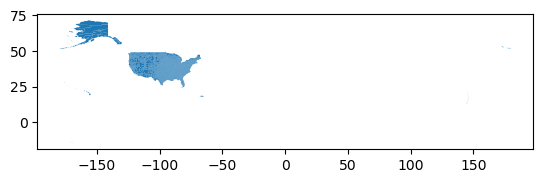

In [719]:
# d. The extent of the plot is currently too wide; this may suggest that the Pacific territories were included
counties.plot()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### 6.B. Cleaning

Simplify column names as needed.

In [720]:
# Set column names to lower case and separated by "_"
counties.columns = counties.columns.str.lower().str.replace('fp', '_fp').str.replace('ns','_ns').str.replace('aland', 'a_land').str.replace('awater', 'a_water').str.replace('intpt','intpt_')
counties.columns

Index(['state_fp', 'county_fp', 'county_ns', 'geoid', 'geoidfq', 'name',
       'namelsad', 'lsad', 'class_fp', 'mtfcc', 'csa_fp', 'cbsa_fp',
       'metdiv_fp', 'funcstat', 'a_land', 'a_water', 'intpt_lat', 'intpt_lon',
       'geometry'],
      dtype='object')

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### 6.C. Data selection

Select all the counties for the state of New York in a new variable `ny_counties` and plot them (you may need to look at the metadata).

<Axes: >

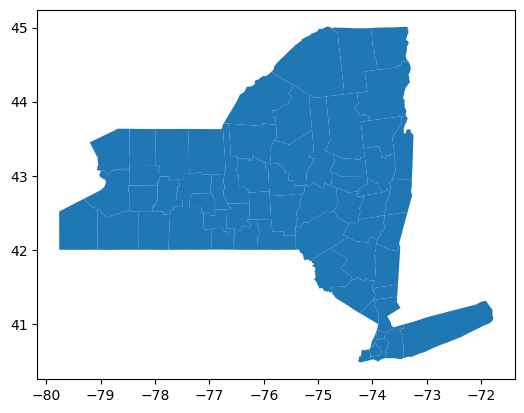

In [721]:
# According to the state geocodes (v2020), New York is associated with the state code "36"
# Select only counties in New York
ny_counties = counties[counties["state_fp"] == "36"]

# Plot to confirm only counties in NY are contained
ny_counties.plot()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## 7 Merging

The goal of this section is to create a single dataframe with the number of spills per county and the corresponding geometries for each county.

### 7.A. Explore data

In the next cells:

a. Print the names of counties in `ny_counties`, without repetition.


In [722]:
# Sort array of NY county names to ensure no duplicates
print(f"Counties in New York State: \n \n {np.sort(ny_counties.name.unique())}")

Counties in New York State: 
 
 ['Albany' 'Allegany' 'Bronx' 'Broome' 'Cattaraugus' 'Cayuga' 'Chautauqua'
 'Chemung' 'Chenango' 'Clinton' 'Columbia' 'Cortland' 'Delaware'
 'Dutchess' 'Erie' 'Essex' 'Franklin' 'Fulton' 'Genesee' 'Greene'
 'Hamilton' 'Herkimer' 'Jefferson' 'Kings' 'Lewis' 'Livingston' 'Madison'
 'Monroe' 'Montgomery' 'Nassau' 'New York' 'Niagara' 'Oneida' 'Onondaga'
 'Ontario' 'Orange' 'Orleans' 'Oswego' 'Otsego' 'Putnam' 'Queens'
 'Rensselaer' 'Richmond' 'Rockland' 'Saratoga' 'Schenectady' 'Schoharie'
 'Schuyler' 'Seneca' 'St. Lawrence' 'Steuben' 'Suffolk' 'Sullivan' 'Tioga'
 'Tompkins' 'Ulster' 'Warren' 'Washington' 'Wayne' 'Westchester' 'Wyoming'
 'Yates']


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

b. Print the names of counties in `spills_per_county`, without repetition. Examine the differences in the outputs.

In [723]:
# Sort array of NY county names with oil spills to ensure no duplicates
# Here, `Tuscarora Indian Reservation` is included in the array of NY counties with oil spills
print(f"Counties in New York State that had oil spills: \n \n {np.sort(spills_per_county.county.unique())}")

Counties in New York State that had oil spills: 
 
 ['Albany' 'Allegany' 'Bronx' 'Broome' 'Cattaraugus' 'Cayuga' 'Chautauqua'
 'Chemung' 'Chenango' 'Clinton' 'Columbia' 'Cortland' 'Delaware'
 'Dutchess' 'Erie' 'Essex' 'Franklin' 'Fulton' 'Genesee' 'Greene'
 'Hamilton' 'Herkimer' 'Jefferson' 'Kings' 'Lewis' 'Livingston' 'Madison'
 'Monroe' 'Montgomery' 'Nassau' 'New Jersey - Region 2' 'New York'
 'Niagara' 'Oneida' 'Onondaga' 'Ontario' 'Orange' 'Orleans' 'Oswego'
 'Otsego' 'Putnam' 'Queens' 'Rensselaer' 'Richmond' 'Rockland' 'Saratoga'
 'Schenectady' 'Schoharie' 'Schuyler' 'Seneca' 'St Lawrence' 'Steuben'
 'Suffolk' 'Sullivan' 'Tioga' 'Tompkins' 'Tuscarora Indian Reservation'
 'Ulster' 'Warren' 'Washington' 'Wayne' 'Westchester' 'Wyoming' 'Yates']


<!-- END QUESTION -->



c. Which are the county names that are in `spills_per_county`, but not in `ny_counties`? Your answer should be a list of strings
HINT: You can use the `numpy` function [`setdiff1d()`](https://numpy.org/doc/stable/reference/generated/numpy.setdiff1d.html), pay attention to the example in the documentation. Store your answer in the `diff_names` variable. 


In [724]:
# Compare and store the returned array of different counties as a list using np.setdiff1d()
diff_names_spills = list(np.setdiff1d(spills_per_county.county.unique(), ny_counties.name.unique()))
diff_names_spills

['New Jersey - Region 2', 'St Lawrence', 'Tuscarora Indian Reservation']

In [725]:
grader.check("7Ac")

7Ac results: All test cases passed!

d. Which are the county names that are in `ny_counties`, but not in `spills_per_county`? Your answer should be a list of strings.


In [726]:
# Compare and store the returned array of different counties as a list using np.setdiff1d()
diff_names_ny = list(np.setdiff1d(ny_counties.name.unique(), spills_per_county.county.unique()))
diff_names_ny

['St. Lawrence']

In [727]:
grader.check("7Ad")

7Ad results: All test cases passed!

e. What is the number of spills in 'Tuscarora Indian Reservation'?


In [728]:
# e. Use .loc[] to pass a conditional to obtain the row associated with Tuscarora Indian Reservation in `county` column
spills_per_county.loc[spills_per_county.county == "Tuscarora Indian Reservation",] 

,county,n_spills
56,Tuscarora Indian Reservation,1


The Tuscarora Indian Reservation had one oil spill.

### 7.B. Data updates

In the next cell, update 'St Lawrence' to 'St. Lawrence' in `spills_per_county` data frame and Verify the update was successful.


In [729]:
# Use replace() via str to replace "St Lawrence" with "St. Lawrence"
spills_per_county.county = spills_per_county.county.str.replace("St Lawrence", "St. Lawrence")

# Confirm name change 
spills_per_county.loc[spills_per_county.county == "St. Lawrence",] 

,county,n_spills
50,St. Lawrence,65


### 7.C. Merge

In the following cells:

a. Use this cell to make any other updates needed for making an inner join of the `spills_per_county` and `ny_counties`. 


In [730]:
# Rename 'name' to 'county' in ny_counties
ny_counties = ny_counties.rename(columns = {"name": "county"})
ny_counties.columns

Index(['state_fp', 'county_fp', 'county_ns', 'geoid', 'geoidfq', 'county',
       'namelsad', 'lsad', 'class_fp', 'mtfcc', 'csa_fp', 'cbsa_fp',
       'metdiv_fp', 'funcstat', 'a_land', 'a_water', 'intpt_lat', 'intpt_lon',
       'geometry'],
      dtype='object')

b. Over-write `ny_counties` as the  inner join of the `spills_per_county` and `ny_counties` dataframes.


In [731]:
ny_counties = pd.merge(ny_counties, spills_per_county, how = "inner", on = "county")
ny_counties.head()

,state_fp,county_fp,county_ns,geoid,geoidfq,county,namelsad,lsad,class_fp,mtfcc,csa_fp,cbsa_fp,metdiv_fp,funcstat,a_land,a_water,intpt_lat,intpt_lon,geometry,n_spills
0,36,101,00974148,36101,0500000US36101,Steuben,Steuben County,06,H1,G4020,236,18500,None,A,3601398422,35039875,+42.2667252,-077.3855253,"POLYGON ((-77.08327 42.00002, -77.09391 41.999...",72
1,36,091,00974143,36091,0500000US36091,Saratoga,Saratoga County,06,H1,G4020,104,10580,None,A,2097812305,87488004,+43.1061353,-073.8553872,"POLYGON ((-73.67891 42.91221, -73.67938 42.911...",162
2,36,003,00974100,36003,0500000US36003,Allegany,Allegany County,06,H1,G4020,None,None,None,A,2666409356,12990521,+42.2478532,-078.0261531,"POLYGON ((-78.04342 42.51846, -78.04326 42.518...",30
3,36,075,00974136,36075,0500000US36075,Oswego,Oswego County,06,H1,G4020,532,45060,None,A,2464650884,933469962,+43.4614431,-076.2092618,"POLYGON ((-76.02509 43.70702, -76.02004 43.706...",68
4,36,111,00974153,36111,0500000US36111,Ulster,Ulster County,06,H1,G4020,408,28740,None,A,2911757764,94596810,+41.9472124,-074.2654582,"POLYGON ((-74.07480 42.09659, -74.06441 42.120...",162



From our previous exploration we know that Tuscarora Indian Reservation will not be in the join. Tuscarora Indian Reservation is located within Niagara county. 

c. Since the Tuscarora Indian Reservation does not appear in the `ny_counties` dataframe, add one spill to Niagara county. We will add a note about this in our final map. Add the cells you need to make this update **and** verify that the dataframe was updated.

In [732]:
# Add an additional spill to Niagara County to account for absence of Tuscarora Indian Reservation
ny_counties.loc[ny_counties.county == "Niagara", "n_spills"] += 1

# Double check "n_spills" for Niagara County changed from 88 to 89 spills
ny_counties.loc[ny_counties.county == "Niagara"]

,state_fp,county_fp,county_ns,geoid,geoidfq,county,namelsad,lsad,class_fp,mtfcc,csa_fp,cbsa_fp,metdiv_fp,funcstat,a_land,a_water,intpt_lat,intpt_lon,geometry,n_spills
45,36,063,00974130,36063,0500000US36063,Niagara,Niagara County,06,H1,G4020,160,15380,None,A,1352876140,1598772310,+43.2726719,-078.8129431,"POLYGON ((-78.49165 43.08396, -78.49179 43.084...",89


## 8. Map
a. Create a choropleth map of the number of petroleum spills per county in the state of New York in 2023. 
Your map should be polished and have (at least) the following updates:
- a legend indicating the number of spills
- an updated color map
- a title 
- no axis
- an annotation with the data source (New York State Department of Environmental Conservation) and date of access



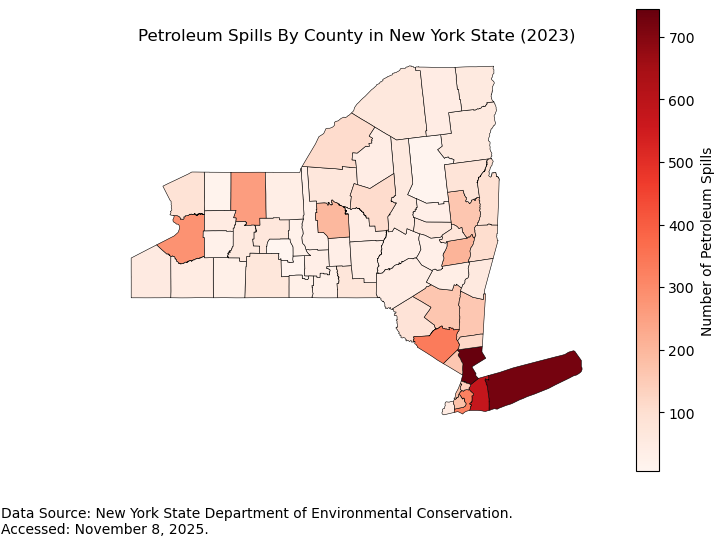

744

In [741]:
# Define figure and axis for subplots 
fig, ax = plt.subplots(figsize = (8,6)) # Adjust dimensions

# Assign plot attributes to axis
ax = ny_counties.plot(
    column = "n_spills", # Use values from n_spills
    cmap = "Reds", # Use inverted color palette
    edgecolor = "black", # Establish border colors for counties
    linewidth = .4, # Set width enough for definition
    legend = True, # Enable legend 
    legend_kwds = {"label": "Number of Petroleum Spills"}, # Pass dictionary for legend title
    ax = ax # Prevent reassigning axis to avoid double production of empty figure
)

# Call "ax" and set a title
ax.set_title("Petroleum Spills By County in New York State (2023)")

# Turn off axis
ax.set_axis_off()

# Include caption with data source and date of access
ax.annotate(
    "Data Source: New York State Department of Environmental Conservation. \nAccessed: November 8, 2025.", 
    xy = (1,6), # Coordinate position in bottom left corner
    xycoords = "figure points") # Set points from lower left 

# Show plot
plt.show()

b. Write a description of how the map was created, including key takeaways. If you need to do additional data analysis to include relevant information from the data, you may include additional cells here.

This map was created utilizing data containing oil spills for New York State counties from January to October 2023. Data filtering was conducted to obtain information for oil spills that occurred between January-October 2023 (`spills_per_county`) as well as counties in New York for sate code "36" (`ny_counties`). An inner join was conducted via `pd.merge()` to join `ny_counties` and `spills_per_county`such that each county in New York would have an associated number of petroleum spills. A figure and axis were defined prior to mapping to establish a figure size. The number of spills per county (`n_spills`) were then mapped to each county's geometry. A reverse color palette was defined where "lighter" red indicated fewer spills compared to more frequent spills (noted in darker red). A line width was defined to outline the borders of each county, and a legend was displayed to reference the amount of petroleum spills in a given county. Axes displaying latitude and longitude coordinates were hidden to produce a clearer visualization. Finally, a caption was included to provide a reference to the data origin and the date of access.





From the map, it is observable that the most populous coastal counties have the most frequent petroleum spills compared to inland counties. Suffolk, Nassau, Queens, and Westchester Counties had the most numerous petroleum spills in 2023 at around 500-750 spills. Erie, Monroe, and Sullivan Counties also had a relatively larger number of spills at around 300-400 spills. It is possible that more frequent spills are observed in coastal counties because of non-renewable energy generation and industry. Essentially, coastal counties like Suffolk County may harbor increased oil refineries from active industry, thus making the county more prone to petroleum spills. The proximity to the ocean as a readily available source of oil may also contribute to frequent oil spills in counties such as Suffolk and Nassau Counties. Interestingly, some inland counties like Erie County have larger numbers of spills compared to surrounding counties in that area. It is possible that these counties along the state border harbor larger populations and thus require additional energy to sustain residents in urban cities. As expected, inland counties generally have much fewer spills given their rural nature (less populated) and proximity away from a readily available source of oil, such as the ocean.


## Complete workflow

Collect all the relevant code into the first blank cell of the notebook titled "COMPLETE WORKFLOW". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the choropleth map of the number of petroleum spills per county in the state of New York in 2023. The only ouput of this cell should be the choropleth map  you produced in the previous exercise. Further guidance on what to include in this final workflow is in the assignment rubric.

##### Run the cell below to run all autograder tests. 

In [734]:
grader.check_all()

7Ac results: All test cases passed!

7Ad results: All test cases passed!

q5d results:
    q5d - 1 result:
        ❌ Test case failed
        Trying:
            def test_q3(student_data):
                try:
                    expected_data = pd.read_csv('data/q5d_df.csv').drop(columns='Unnamed: 0')
                    pd.testing.assert_frame_equal(expected_data, student_data)
                except AssertionError:
                    raise AssertionError('Incorrect answer.')
        Expecting nothing
        ok
        Trying:
            test_q3(spills_per_county)
        Expecting nothing
        **********************************************************************
        Line 7, in q5d 0
        Failed example:
            test_q3(spills_per_county)
        Exception raised:
            Traceback (most recent call last):
              File "<doctest q5d 0[0]>", line 4, in test_q3
                pd.testing.assert_frame_equal(expected_data, student_data)
              File "/op